In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew

In [19]:
housing_data = pd.read_csv("housing_data.csv")  # housing_data load

In [71]:
# Handle missing values 
housing_data = housing_data.dropna()

# Convert categorical variables if needed
housing_data.loc[:, 'MSZoning'] = housing_data['MSZoning'].astype('category')


# Function for Univariate Analysis

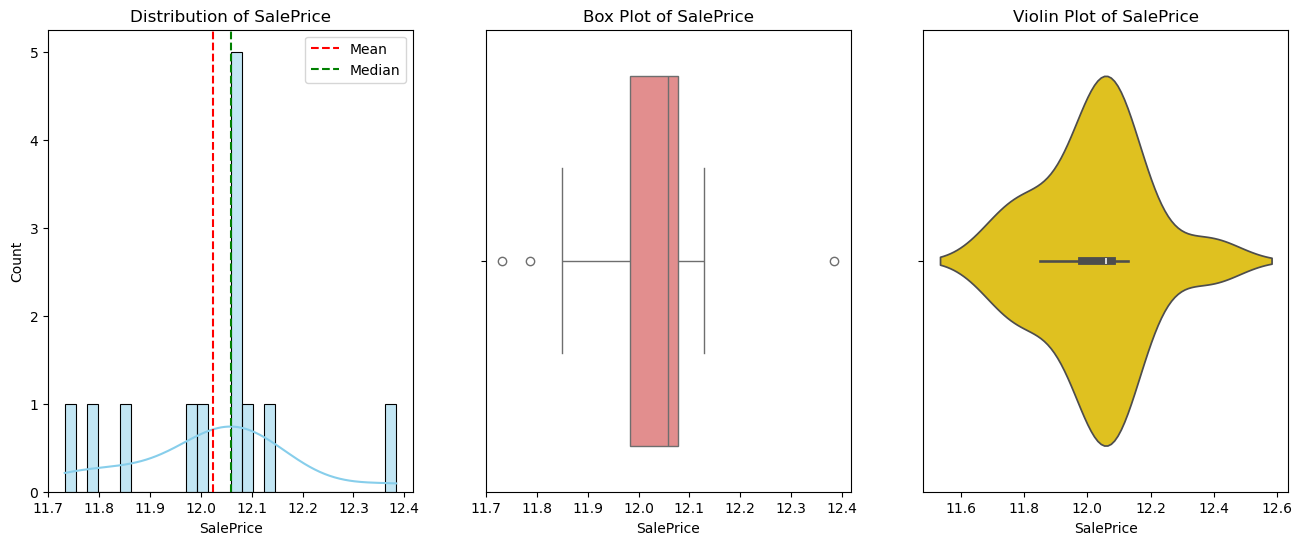

Descriptive Statistics for SalePrice:

count    13.000000
mean     12.022941
std       0.165488
min      11.732069
25%      11.982935
50%      12.058158
75%      12.078245
max      12.384223
Name: SalePrice, dtype: float64


In [92]:
def univariate_analysis(df, column, bins=30):
    """univariate analysis using histogram, KDE, boxplot, and violin plot."""
    plt.figure(figsize=(16, 6))

    # Histogram & KDE Plot
    plt.subplot(1, 3, 1)
    sns.histplot(df[column], bins=bins, kde=True, color='skyblue')
    plt.axvline(df[column].mean(), color='red', linestyle='dashed', label='Mean')
    plt.axvline(df[column].median(), color='green', linestyle='dashed', label='Median')
    plt.legend()
    plt.title(f'Distribution of {column}')
    
    # Box Plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[column], color='lightcoral')
    plt.title(f'Box Plot of {column}')
    
    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=df[column], color='gold')
    plt.title(f'Violin Plot of {column}')
    
    plt.show()

    #  Descriptive Statistics
    print(f"Descriptive Statistics for {column}:\n")
    print(df[column].describe())

# Example: Univariate Analysis on 'SalePrice'
univariate_analysis(housing_data, 'SalePrice')


# Analyze Multiple Variables

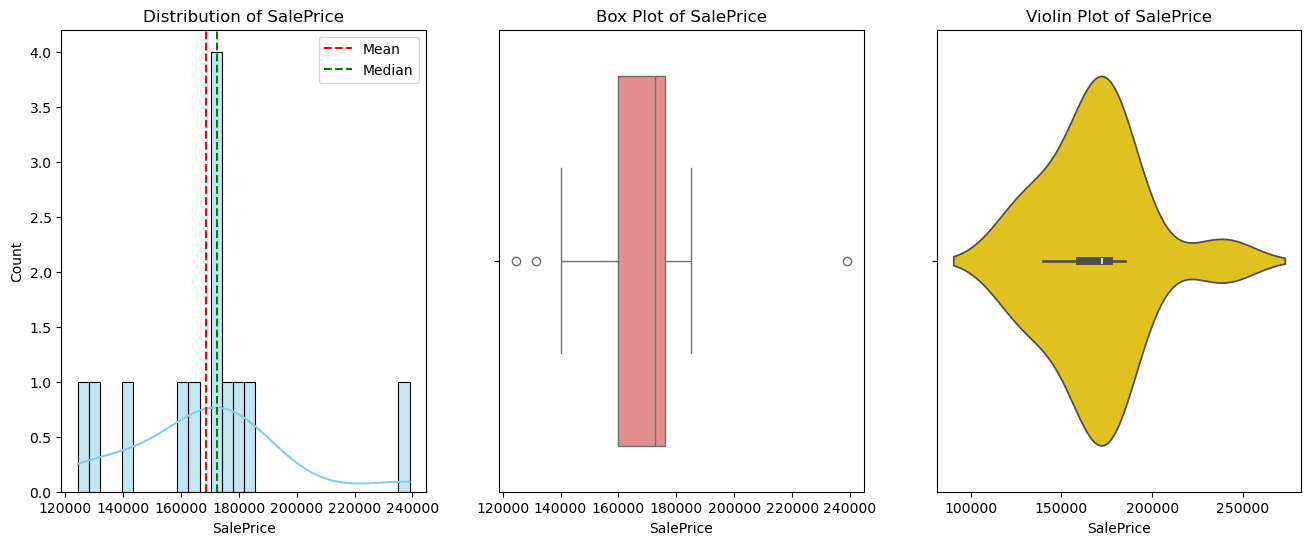

Descriptive Statistics for SalePrice:

count        13.000000
mean     168664.076923
std       28449.288674
min      124500.000000
25%      160000.000000
50%      172500.000000
75%      176000.000000
max      239000.000000
Name: SalePrice, dtype: float64


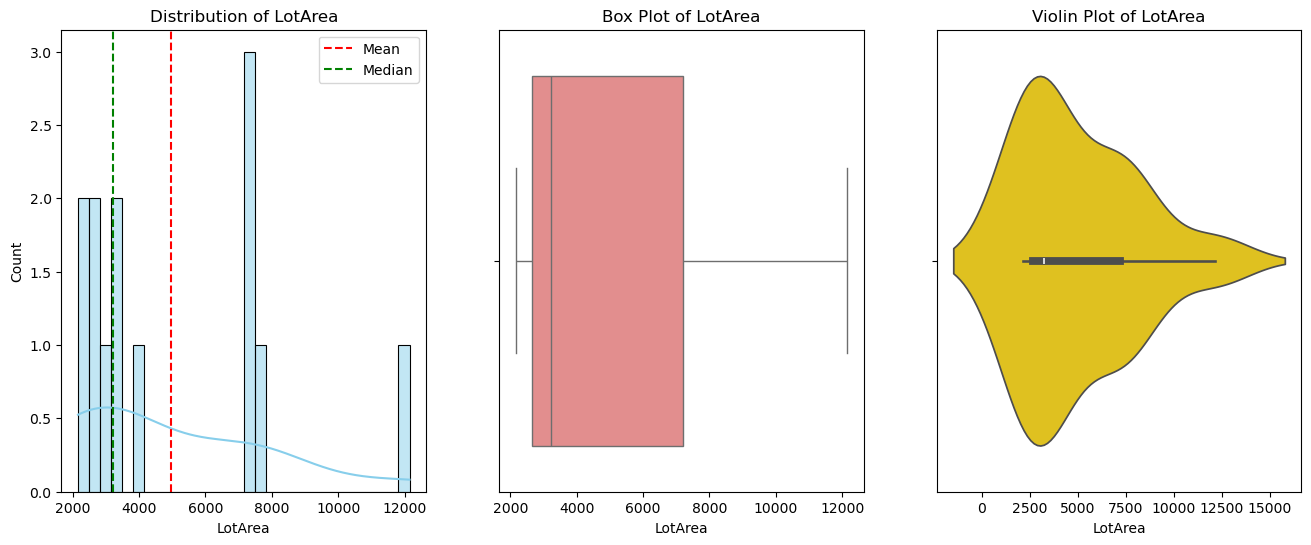

Descriptive Statistics for LotArea:

count       13.000000
mean      4975.846154
std       3044.278564
min       2160.000000
25%       2645.000000
50%       3230.000000
75%       7200.000000
max      12150.000000
Name: LotArea, dtype: float64


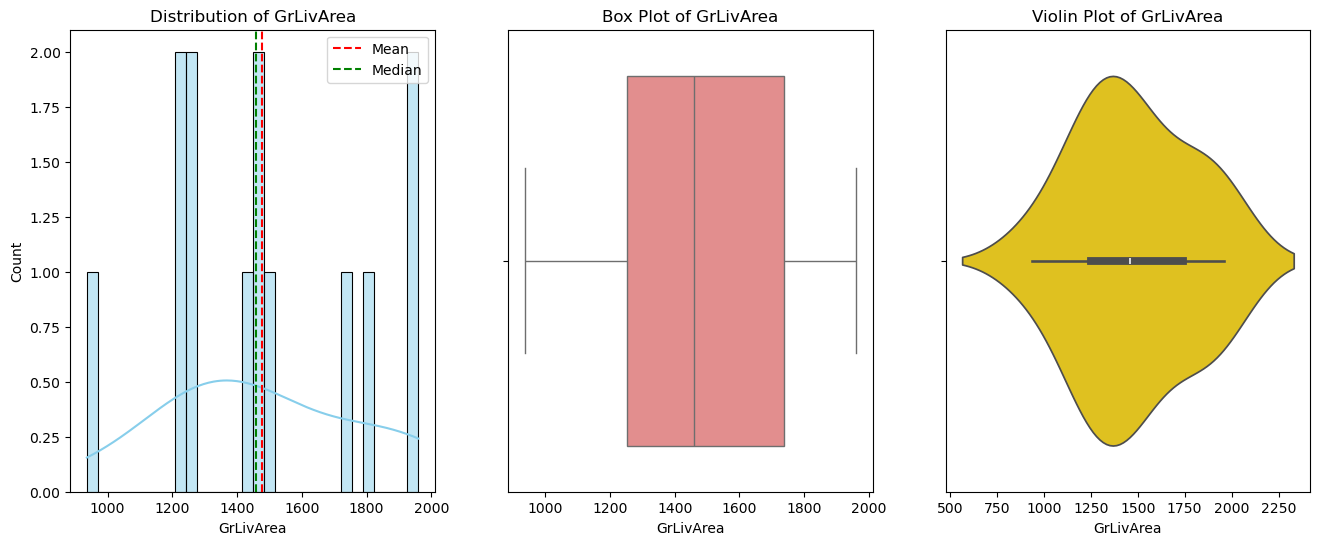

Descriptive Statistics for GrLivArea:

count      13.000000
mean     1477.923077
std       309.110676
min       936.000000
25%      1252.000000
50%      1458.000000
75%      1739.000000
max      1960.000000
Name: GrLivArea, dtype: float64


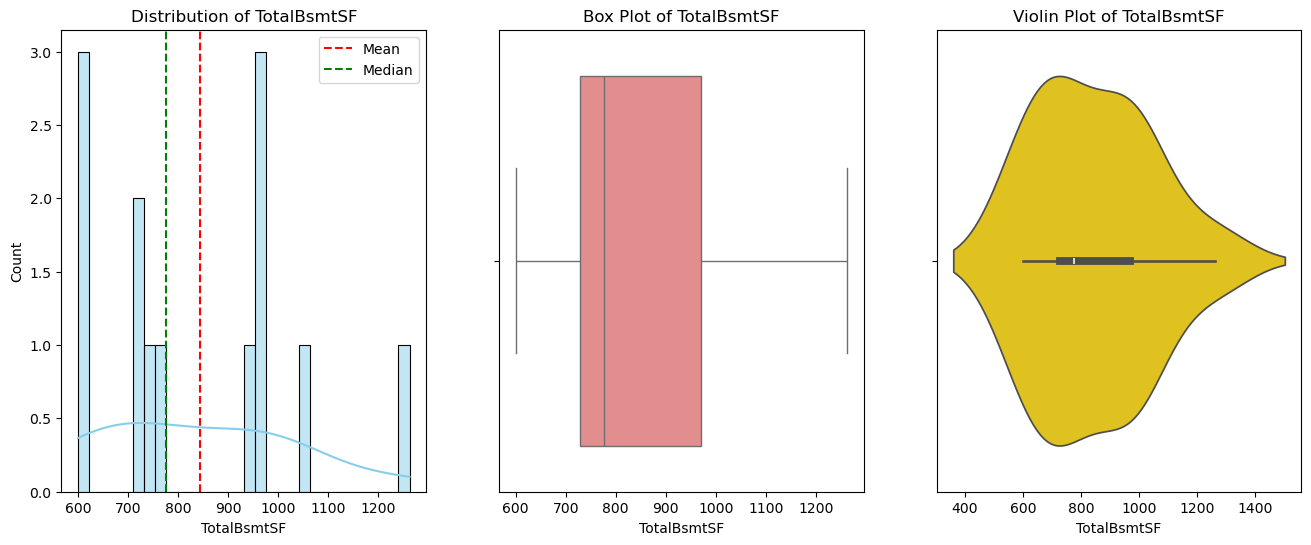

Descriptive Statistics for TotalBsmtSF:

count      13.000000
mean      842.692308
std       200.073480
min       600.000000
25%       729.000000
50%       776.000000
75%       970.000000
max      1262.000000
Name: TotalBsmtSF, dtype: float64


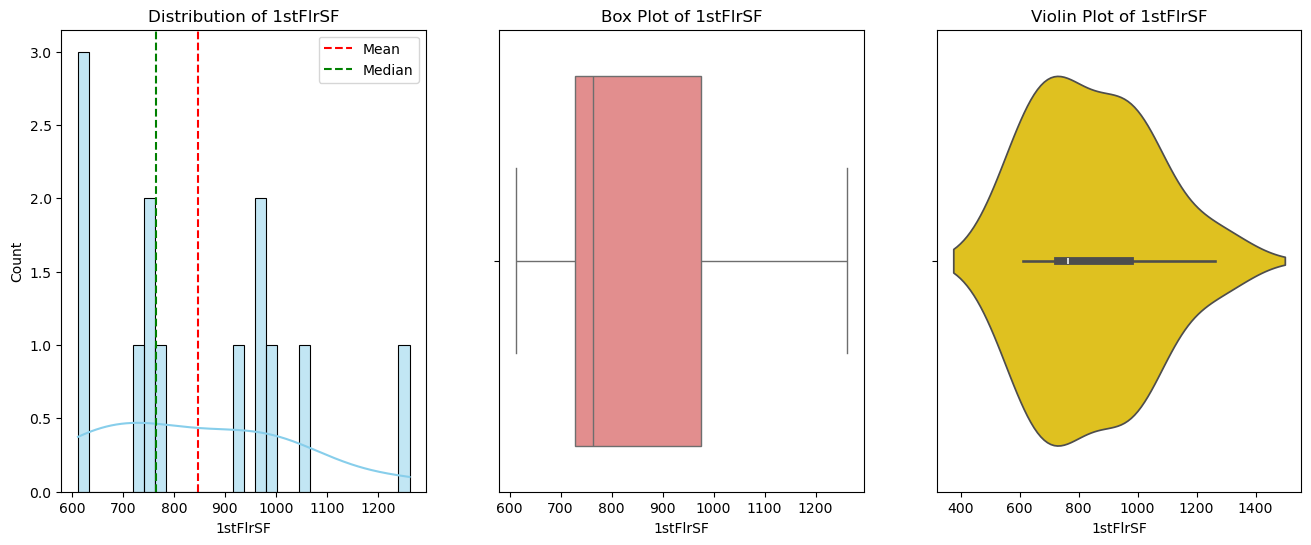

Descriptive Statistics for 1stFlrSF:

count      13.000000
mean      846.615385
std       197.720147
min       612.000000
25%       729.000000
50%       764.000000
75%       975.000000
max      1262.000000
Name: 1stFlrSF, dtype: float64


In [77]:
numeric_columns = ['SalePrice', 'LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF']

for col in numeric_columns:
    univariate_analysis(housing_data, col)


# Analyze Categorical Variables

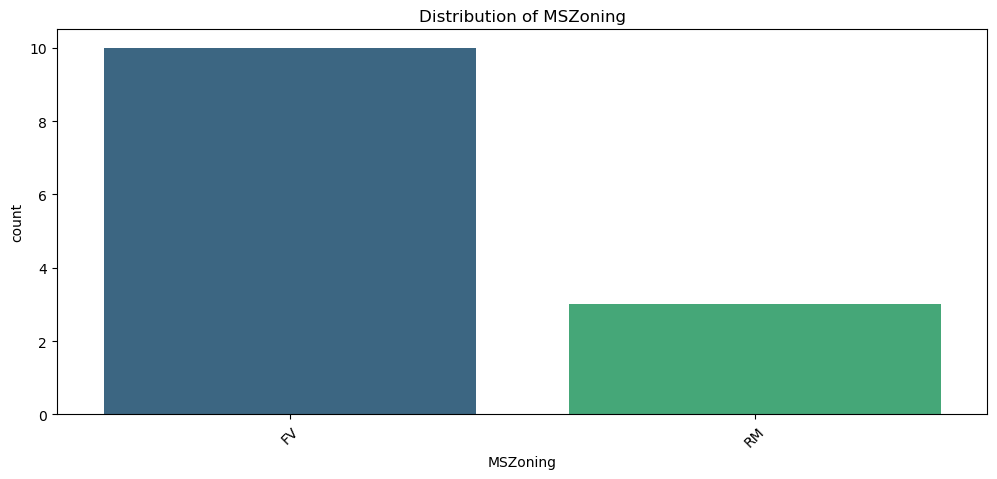

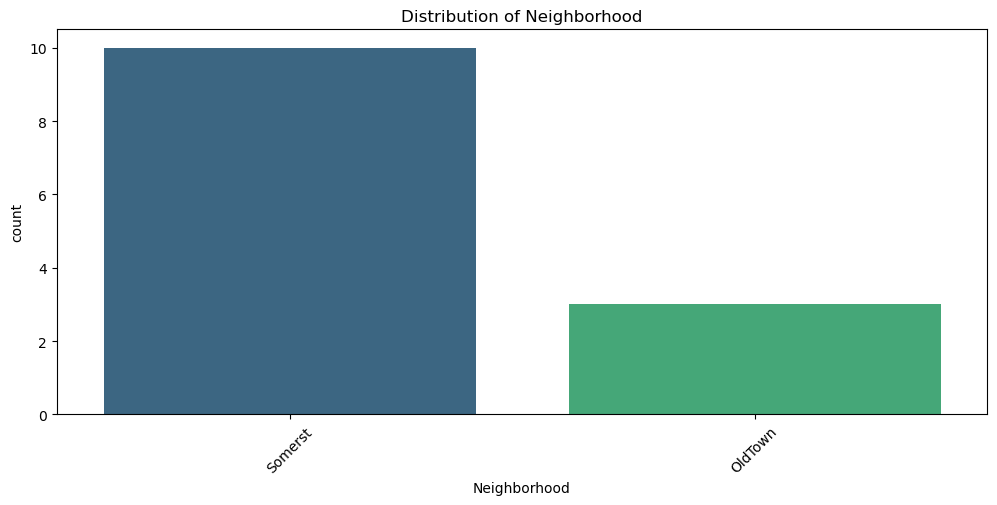

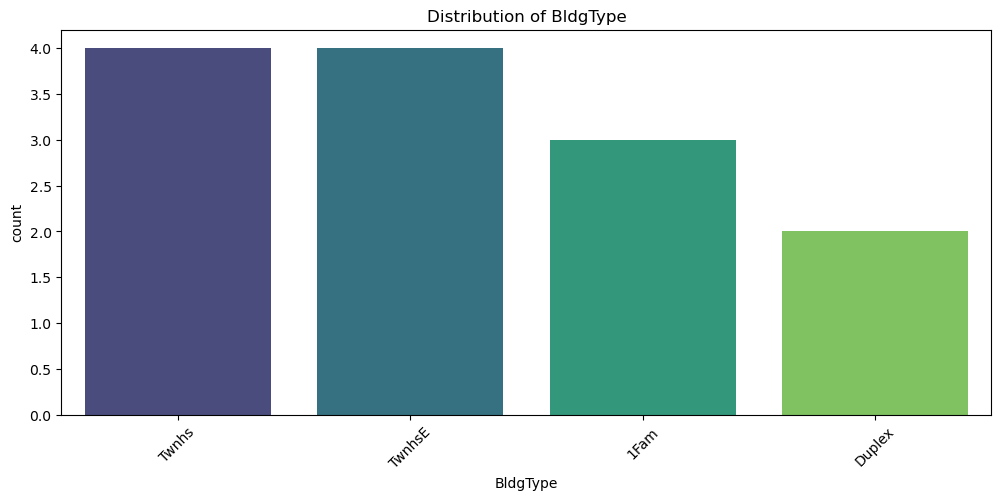

In [87]:
def categorical_analysis(df, column):
    """Plots the count distribution of a categorical variable."""
    plt.figure(figsize=(12, 5))
    
    sns.countplot(x=column, data=df, hue=column, palette='viridis', order=df[column].value_counts().index, legend=False)

    plt.xticks(rotation=45)
    plt.title(f"Distribution of {column}")
    plt.show()

categorical_columns = ['MSZoning', 'Neighborhood', 'BldgType']
for col in categorical_columns:
    categorical_analysis(housing_data, col)


# Detect Skewness and Apply Log Transformations 

Skewness of SalePrice: 0.7255236429863362
Skewness of LotArea: 1.0353816333975383
Skewness of GrLivArea: 0.15673541182043974
Skewness of TotalBsmtSF: 0.5024251756667162
Skewness of 1stFlrSF: 0.5161148955247277


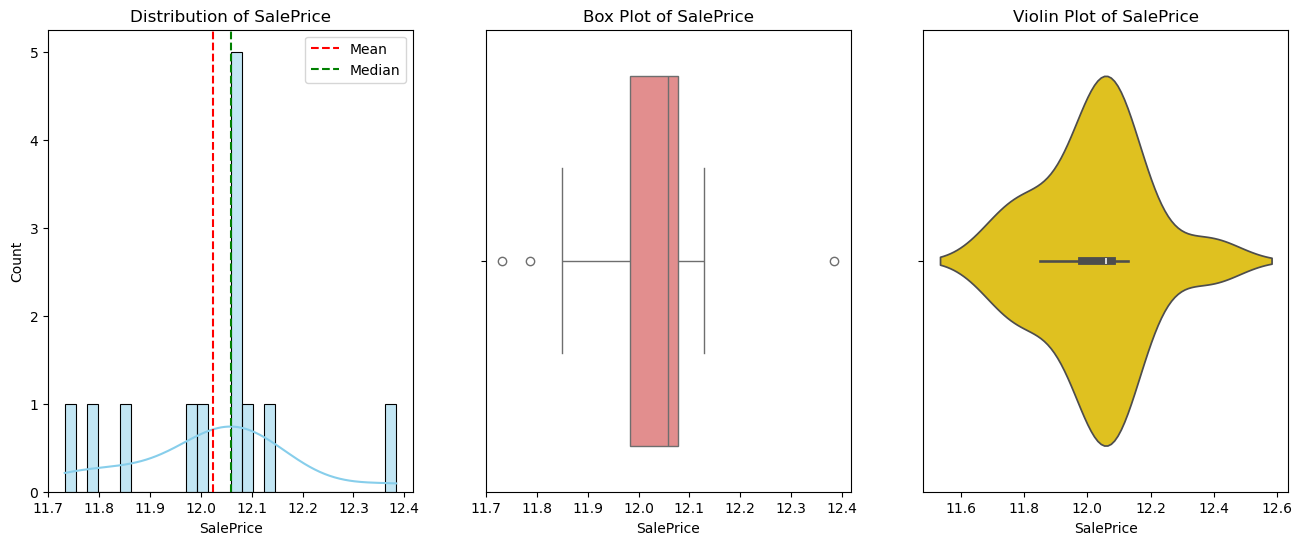

Descriptive Statistics for SalePrice:

count    13.000000
mean     12.022941
std       0.165488
min      11.732069
25%      11.982935
50%      12.058158
75%      12.078245
max      12.384223
Name: SalePrice, dtype: float64


In [83]:


# Detect skewness
for col in numeric_columns:
    print(f"Skewness of {col}: {skew(housing_data[col])}")

 log transformation if skewness > 1
for col in ['SalePrice', 'LotArea']:
    housing_data[col] = np.log1p(housing_data[col])

# Re-run analysis after transformation
univariate_analysis(housing_data, 'SalePrice')
